In [2]:
#引入相关的库
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import Model
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split
import astropy.units as u 
import pandas as pd
import os
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.utils import np_utils
import tensorflow.keras.backend as K
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model

In [3]:
# # #读取3700维数据和标签
# # data_u=pd.read_csv('03/data_u.csv',header=None,delimiter=' ')
# # data_u=np.array(data_u)
# label_u=pd.read_csv('03/label_u.csv',header=None)
# label_u=np.array(label_u)

# # data_g=pd.read_csv('03/data_g.csv',header=None,delimiter=' ')
# # data_g=np.array(data_g)
# label_g=pd.read_csv('03/label_g.csv',header=None)
# label_g=np.array(label_g)

# # data_r=pd.read_csv('03/data_r.csv',header=None,delimiter=' ')
# # data_r=np.array(data_r)
# label_r=pd.read_csv('03/label_r.csv',header=None)
# label_r=np.array(label_r)

#读取128维光谱数据
data_128=pd.read_csv('03/data128.csv',header=None,delimiter=',')
data_128=np.array(data_128)

# #读取14*14图像数据
# data_qso_u=np.load('02/qso_u_img.npy')
# data_qso_u=np.array(data_qso_u)
# data_star_u=np.load('02/star_u_img.npy')
# data_star_u=np.array(data_star_u)

# data_qso_g=np.load('02/qso_g_img.npy')
# data_qso_g=np.array(data_qso_g)
# data_star_g=np.load('02/star_g_img.npy')
# data_star_g=np.array(data_star_g)

data_qso_r=np.load('02/qso_r_img.npy')
data_qso_r=np.array(data_qso_r)
data_star_r=np.load('02/star_r_img.npy')
data_star_r=np.array(data_star_r)

label=pd.read_csv('03/label.csv',header=None)
label=np.array(label)

In [4]:
print(data_128[0])

[4.7856570e-04 9.9806565e-01 1.8107295e-03 3.6290288e-04 5.5824520e-03
 9.9545455e-01 1.4267564e-03 9.9631410e-01 9.9955940e-01 9.9965180e-01
 1.8700957e-04 1.6868114e-04 1.7905235e-04 9.9717870e-01 9.9179950e-01
 4.8521160e-04 9.9543107e-01 9.9961910e-01 5.7595970e-04 3.0392408e-04
 5.7716668e-03 8.4608793e-04 9.9957550e-01 9.9862050e-01 9.9999750e-01
 9.9988320e-01 9.9760070e-01 9.9999726e-01 5.9595704e-04 9.9955030e-01
 9.9542570e-01 9.9949694e-01 9.9610436e-01 5.0164460e-03 4.9487352e-03
 1.2362003e-04 9.9583230e-01 9.9887514e-01 9.9957454e-01 9.9669003e-01
 9.9930300e-01 5.4004790e-04 9.9933660e-01 9.9883670e-01 3.5843550e-03
 1.3927221e-03 9.9975586e-01 6.0017705e-03 9.9992070e-01 7.4046850e-04
 6.6721440e-04 2.2026896e-04 6.9448950e-03 9.9817544e-01 1.6406178e-04
 4.4083893e-03 3.9765240e-04 1.2478232e-04 9.9962860e-01 9.9459124e-01
 7.7065825e-04 4.4709444e-04 9.9486184e-01 2.6264190e-03 9.9597645e-01
 4.4119358e-04 9.9920297e-01 8.2239510e-04 2.1722913e-04 9.9490150e-01
 9.964

In [27]:
print(data_qso_u.shape,data_qso_g.shape,data_qso_r.shape)
print(data_star_u.shape,data_star_g.shape,data_star_r.shape)
print(label.shape)

(16463, 14, 14) (16463, 14, 14) (16463, 14, 14)
(8255, 14, 14) (8255, 14, 14) (8255, 14, 14)
(24718, 1)


In [14]:
data_qso=[]
for i in range(len(data_qso_u)):
    data_qso.append(data_qso_u[i])
    data_qso.append(data_qso_g[i])
    data_qso.append(data_qso_r[i])
data_qso=np.array(data_qso)
data_qso=data_qso.reshape((len(data_qso_u),14,14,3))
print(data_qso.shape)
# print(data_qso[0])

data_star=[]
for i in range(len(data_star_u)):
    data_star.append(data_star_u[i])
    data_star.append(data_star_g[i])
    data_star.append(data_star_r[i])
data_star=np.array(data_star)
data_star=data_star.reshape((len(data_star_u),14,14,3))
print(data_star.shape)

data_all=np.concatenate((data_qso,data_star),axis=0)
print(data_all.shape)

(16463, 14, 14, 3)
(8255, 14, 14, 3)
(24718, 14, 14, 3)


In [37]:
data_all=np.concatenate((data_qso_r,data_star_r),axis=0)
print(data_all.shape)

(24718, 14, 14)


In [38]:
#分割数据集
X = np.zeros((len(data_all),14,14))
X[:,:] = data_all
y = data_128
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4)

In [30]:
#构建网络
model=Sequential()
model.add(Reshape((14,14,1),input_shape=(14,14)))
model.add(Conv2D(16,(3,3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [21]:
import tensorflow as tf
#精确率评价指标
def metric_precision(y_true,y_pred): 
 TP=tf.reduce_sum(y_true*tf.round(y_pred))
 TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
 FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
 FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
 precision=TP/(TP+FP)
 return precision
 
#召回率评价指标
def metric_recall(y_true,y_pred): 
 TP=tf.reduce_sum(y_true*tf.round(y_pred))
 TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
 FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
 FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
 recall=TP/(TP+FN)
 return recall
 
#F1-score评价指标
def metric_F1score(y_true,y_pred): 
 TP=tf.reduce_sum(y_true*tf.round(y_pred))
 TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
 FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
 FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
 precision=TP/(TP+FP)
 recall=TP/(TP+FN)
 F1score=2*precision*recall/(precision+recall)
 return F1score
 
# #编译阶段引用自定义评价指标示例
# model.compile(optimizer='adam',
#      loss='binary_crossentropy',
#      metrics=['accuracy',
#             metric_precision,
#             metric_recall,
#             metric_F1score])

In [39]:
from tensorflow.python.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
from tensorflow.python.keras.optimizers import *
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    sqaure_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * sqaure_pred + (1 - y_true) * margin_square)
my_callbacks = [EarlyStopping(patience=10),
             ModelCheckpoint('04/green.h5', save_best_only=True,save_weight_only = False)]
model.compile(loss=contrastive_loss,
              optimizer=Adam(1e-3, amsgrad=True),
              metrics=[metric_precision,metric_recall,metric_F1score])
model.fit(X_train,y_train, epochs=100,validation_data = (X_test,y_test), workers=4, use_multiprocessing=True,
                      batch_size = 256,
                    callbacks=my_callbacks)

Train on 14830 samples, validate on 9888 samples
Epoch 1/100
14830/14830 [==============================] - 1s 72us/sample - loss: 0.1645 - metric_precision: 0.1818 - metric_recall: 0.1909 - metric_F1score: 0.1862 - val_loss: 0.1293 - val_metric_precision: 0.1519 - val_metric_recall: 0.1586 - val_metric_F1score: 0.1552
Epoch 2/100
14830/14830 [==============================] - 0s 28us/sample - loss: 0.1181 - metric_precision: 0.1427 - metric_recall: 0.1494 - metric_F1score: 0.1460 - val_loss: 0.1164 - val_metric_precision: 0.1453 - val_metric_recall: 0.1519 - val_metric_F1score: 0.1485
Epoch 3/100
14830/14830 [==============================] - 0s 26us/sample - loss: 0.1131 - metric_precision: 0.1390 - metric_recall: 0.1455 - metric_F1score: 0.1422 - val_loss: 0.1165 - val_metric_precision: 0.1425 - val_metric_recall: 0.1487 - val_metric_F1score: 0.1455
Epoch 4/100
14830/14830 [==============================] - 0s 27us/sample - loss: 0.1107 - metric_precision: 0.1361 - metric_recall: 0.

Epoch 31/100
14830/14830 [==============================] - 0s 26us/sample - loss: 0.0981 - metric_precision: 0.1219 - metric_recall: 0.1275 - metric_F1score: 0.1246 - val_loss: 0.1045 - val_metric_precision: 0.1316 - val_metric_recall: 0.1377 - val_metric_F1score: 0.1346
Epoch 32/100
14830/14830 [==============================] - 0s 27us/sample - loss: 0.0986 - metric_precision: 0.1215 - metric_recall: 0.1271 - metric_F1score: 0.1242 - val_loss: 0.1033 - val_metric_precision: 0.1341 - val_metric_recall: 0.1405 - val_metric_F1score: 0.1372
Epoch 33/100
14830/14830 [==============================] - 0s 26us/sample - loss: 0.0977 - metric_precision: 0.1199 - metric_recall: 0.1255 - metric_F1score: 0.1226 - val_loss: 0.1034 - val_metric_precision: 0.1303 - val_metric_recall: 0.1363 - val_metric_F1score: 0.1332
Epoch 34/100
14830/14830 [==============================] - 0s 26us/sample - loss: 0.0979 - metric_precision: 0.1208 - metric_recall: 0.1264 - metric_F1score: 0.1236 - val_loss: 0.1

In [23]:
保存该模型能得到的128维度的向量
y1=model.predict(data_all)
np.savetxt('04/gen_data128.csv',y1,delimiter=',')

In [9]:
print(y1.shape)

(24718, 128)


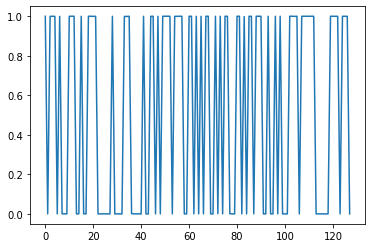

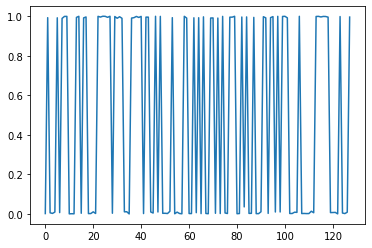

In [10]:
plt.plot(y1[200])
plt.show()
plt.plot(data_128[200])    